In [1]:
%matplotlib inline

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import time

In [3]:
transform = transforms.Compose(
            [
                transforms.ToTensor(),
                transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
            ]
)

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1, 2, 0)))
dataiter = iter(trainloader)
images, labels = dataiter.next()

plane   car   dog   dog


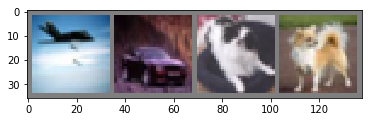

In [7]:
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(len(labels))))

In [8]:
import torch.nn as nn
import torch.nn.functional as F

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [10]:
net = Net()

In [11]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [12]:
time_start=time.time()
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0
print('Finished Training')
time_end=time.time()
print('totally cost',time_end-time_start)

[1,  2000] loss: 2.182
[1,  4000] loss: 1.840
[1,  6000] loss: 1.679
[1,  8000] loss: 1.588
[1, 10000] loss: 1.535
[1, 12000] loss: 1.490
[2,  2000] loss: 1.401
[2,  4000] loss: 1.369
[2,  6000] loss: 1.331
[2,  8000] loss: 1.311
[2, 10000] loss: 1.283
[2, 12000] loss: 1.279
Finished Training
totally cost 106.39608144760132


GroundTruth:    cat  ship  ship plane


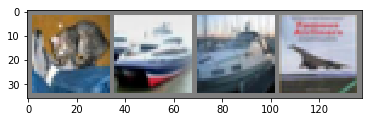

In [16]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# 显示图片
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(len(labels))))

In [17]:
outputs = net(images)

In [18]:
outputs

tensor([[-1.1227, -1.5762,  0.8390,  2.1432,  1.1337,  1.0989,  1.3821, -0.3778,
         -1.4189, -1.4784],
        [ 2.6182,  5.9644, -1.9877, -3.6044, -3.1938, -3.8819, -1.9065, -4.0926,
          5.1373,  2.9160],
        [ 1.9621,  2.1827, -0.2759, -1.2137, -1.0251, -2.0825, -1.2241, -2.1857,
          2.1617,  0.6827],
        [ 4.1047,  1.9552,  0.3083, -1.9848, -0.4413, -3.1805, -2.2145, -2.5254,
          3.5587, -0.1859]], grad_fn=<AddmmBackward>)

In [27]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(len(labels))))

Predicted:    cat   car   car plane


In [57]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


In [71]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 48 %
Accuracy of   car : 88 %
Accuracy of  bird : 44 %
Accuracy of   cat : 33 %
Accuracy of  deer : 59 %
Accuracy of   dog : 30 %
Accuracy of  frog : 67 %
Accuracy of horse : 51 %
Accuracy of  ship : 77 %
Accuracy of truck : 44 %


In [15]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 确认我们的电脑支持CUDA，然后显示CUDA信息：

print(device)

cuda:0


In [16]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
criterion = criterion.to(device)
time_start=time.time()
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)###费时？
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0
print('Finished Training')
time_end=time.time()
print('totally cost',time_end-time_start)

[1,  2000] loss: 1.200
[1,  4000] loss: 1.199
[1,  6000] loss: 1.185
[1,  8000] loss: 1.182
[1, 10000] loss: 1.186
[1, 12000] loss: 1.161
[2,  2000] loss: 1.082
[2,  4000] loss: 1.096
[2,  6000] loss: 1.103
[2,  8000] loss: 1.084
[2, 10000] loss: 1.079
[2, 12000] loss: 1.078
Finished Training
totally cost 168.38959980010986
